3.5


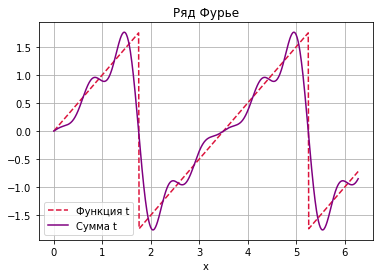

In [218]:
from scipy.integrate import quad # модуль для интегрирования
import matplotlib.pyplot as plt # модуль для графиков
import numpy as np # модуль для операций со списками и массивами
from tkinter import *
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from math import log
from numpy import sin,cos

class Dialog:
    root=Tk()
    period=DoubleVar()
    func=[]
    razl=IntVar()
    N=IntVar()
    curFuncNum=-1
    def __init__(self):
        lab= Label(self.root,text="Количество членов суммы",
                   font=('Verdana', 10, 'bold'),background='white')
        scale=Scale(self.root,orient="horizontal",
                    resolution=1, from_=3, to=40, variable=self.N)
        lab1= Label(self.root,text="Период разложения",
                   font=('Verdana', 10, 'bold'),background='white')
        scale1=Scale(self.root,orient="horizontal",
                    resolution=np.pi/10, from_=np.pi/10, to=np.pi*11/10, variable=self.period)
        self.razl.set(0)
        lab2= Label(self.root,text="Разложение по",
                   font=('Verdana', 10, 'bold'),background='white')
        cb0 = Radiobutton(self.root,text="Sin", value=0, variable=self.razl)
        cb1 = Radiobutton(self.root,text="Cos", value=1, variable=self.razl)
        cb2 = Radiobutton(self.root,text="Sin and Cos", value=2, variable=self.razl)
        but = Button(self.root, text='Добавить функцию', width=20, height=2, 
                                font=('Verdana', 15, 'bold'),
                                background='white',
                                command=self.plus_but_press)
        but1 = Button(self.root, text='OK', width=2, height=2, 
                     font=('Verdana', 15, 'bold'),
                     background='white',command=self.close_fun)
        lab.pack()
        scale.pack()
        lab1.pack()
        scale1.pack()
        lab2.pack()
        cb0.pack()
        cb1.pack()
        cb2.pack()
        but.pack()
        but1.pack()
        self.root.mainloop()
    def plus_but_press(self):
        self.curFuncNum+=1
        self.func.append(0)
        self.func[self.curFuncNum]=StringVar()
        lab= Label(self.root,text="Функция",
                         font=('Verdana', 10, 'bold'),background='white')
        input1=Entry(self.root,textvariable=self.func[self.curFuncNum],
                        width=20,bg='white',font=('Verdana', 15))
        lab.pack()
        input1.pack()
        self.root.update()
    def close_fun(self):
        for i in range(len(self.func)):
            self.func[i]=self.func[i].get()
        self.rasp()
        self.period=self.period.get()
        self.N=self.N.get()
        print(self.period)
        self.razl=self.razl.get()
        if self.razl==0:
            a="Sin"
        elif self.razl==1:
            a="Cos"
        elif self.razl==2:
            a="SinCos"
        self.razl=a
        self.root.destroy()
    def rasp(self):
        x=0
        for i in range(len(self.func)):
            fun = ''
            for j in range(len(self.func[i])):
                if self.func[i][j] == '^':
                    fun += '**'
                    continue
                fun+=self.func[i][j]            
            self.func[i]=fun
        #print(self.func)
            
dial=Dialog()
razl=dial.razl
T=dial.period; w=2*np.pi/T# период и круговая частота
form=dial.func[0]
def func(t):# анализируемая функция
         t=t%T
         if razl=="Sin":
            if t>T/2:
                a=t-T/2
                t=T/2-a
                p=-eval(form)
            else:
                p=eval(form)
         elif razl=="Cos":
            if t>T/2:
                a=t-T/2
                t=T/2-a
            p=eval(form)
         else:
            p=eval(form)
         return p
def func_1(t,k,w):# функция для расчёта коэффициента a[k] 
         #print(t)
         if t<np.pi:
                  z=func(t)*np.cos(w*k*t)
         else:
                  z=func(t)*np.cos(w*k*t)
         return z
def func_2(t,k,w):#функция для расчёта коэффициента b[k] 
         if t<np.pi:
                  y=func(t)*np.sin(w*k*t)
         else:
                  y=-func(t)*np.sin(w*k*t)
         return y
a=[];b=[];c=dial.N;g=[];m=np.arange(0,c,1);q=np.arange(0,2*np.pi,0.01)# подготовка списков для численного анализа
root=Tk()
a=[round(2*quad(func_1, 0, T, args=(k,w))[0]/T,3) for k in m]# интеграл для a[k], k -номер гармоники 
b=[round(2*quad(func_2, 0, T, args=(k,w))[0]/T,3) for k in m]# интеграл для b[k], k -номер гармоники
F=np.array(a[0]/2)+np.array([0*t for t in q-1])# подготовка массива для анализа с a[0]/2
for k in np.arange(1,c,1):
         F=F+np.array([a[k]*np.cos(w*k*t)+b[k]*np.sin(w*k*t) for t in q])# вычисление членов ряда Фурье
fig=plt.figure()
P=[func(t) for t in q]
plt.title("Ряд Фурье")
plt.plot(q, P, label='Функция '+form, color='crimson',linestyle="--")
plt.plot(q, F, label='Сумма '+form, color='purple')
plt.xlabel("x")
plt.legend(loc='best')
plt.grid(True)
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack()
canvas.draw()
#plt.show()
root.mainloop()

In [214]:
import numpy as np
from math import log
from numpy import sin,cos
class Dialog:
    root=Tk()
    period=DoubleVar()
    func=[]
    razl=IntVar()
    period=IntVar()
    N=IntVar()
    curFuncNum=-1
    def __init__(self):
        lab= Label(self.root,text="Количество членов суммы",
                   font=('Verdana', 10, 'bold'),background='white')
        scale=Scale(self.root,orient="horizontal",
                    resolution=1, from_=3, to=40, variable=self.N)
        lab1= Label(self.root,text="Период разложения",
                   font=('Verdana', 10, 'bold'),background='white')
        scale1=Scale(self.root,orient="horizontal",
                    resolution=np.pi/10, from_=np.pi/10, to=np.pi*11/10, variable=self.period)
        self.razl.set(0)
        lab2= Label(self.root,text="Разложение по",
                   font=('Verdana', 10, 'bold'),background='white')
        cb0 = Radiobutton(text="Sin", value=0, variable=self.razl)
        cb1 = Radiobutton(text="Cos", value=1, variable=self.razl)
        cb2 = Radiobutton(text="Sin and Cos", value=2, variable=self.razl)
        but = Button(self.root, text='Добавить функцию', width=20, height=2, 
                                font=('Verdana', 15, 'bold'),
                                background='white',
                                command=self.plus_but_press)
        but1 = Button(self.root, text='OK', width=2, height=2, 
                     font=('Verdana', 15, 'bold'),
                     background='white',command=self.close_fun)
        lab.pack()
        scale.pack()
        lab1.pack()
        scale1.pack()
        lab2.pack()
        cb0.pack()
        cb1.pack()
        cb2.pack()
        but.pack()
        but1.pack()
        self.root.mainloop()
    def plus_but_press(self):
        self.curFuncNum+=1
        self.func.append(0)
        self.func[self.curFuncNum]=StringVar()
        lab= Label(self.root,text="Функция",
                         font=('Verdana', 10, 'bold'),background='white')
        input1=Entry(self.root,textvariable=self.func[self.curFuncNum],
                        width=20,bg='white',font=('Verdana', 15))
        lab.pack()
        input1.pack()
        self.root.update()
    def close_fun(self):
        for i in range(len(self.func)):
            self.func[i]=self.func[i].get()
        self.rasp()
        self.period=self.period.get()
        self.razl=self.razl.get()
        if self.razl==0:
            a="Sin"
        elif self.razl==1:
            a="Cos"
        elif self.razl==2:
            a="SinCos"
        self.razl=a
        self.root.destroy()
    def rasp(self):
        x=0
        for i in self.func:
            fun = ''
            for j in range(len(i)):
                if i[j] == '^':
                    fun += '**'
                    continue
                if i[j] == 'n' and i[j - 1] == 'l':
                    fun += 'og'
                    continue
                fun+=i[j]            
            i=fun
        print(self.func)
            
        
dial=Dialog()
        
        
    